In [1]:
# 导入必要的库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

# 设置随机种子，保证结果可重复
SEED = 42

# 设置文件路径
csv_path = r'E:\Univercity_all\Leve4_shang\OBU\FinalProject\aptos2019-blindness-detection\train_balanced_fixed.csv'
image_dir = r'E:\Univercity_all\Leve4_shang\OBU\FinalProject\aptos2019-blindness-detection\train_images'

# 读取CSV文件
df_train = pd.read_csv(csv_path)

WORKERS = 2
CHANNEL = 3

IMG_SIZE = 224  # 可根据实际模型输入调整
NUM_CLASSES = 5
TRAIN_NUM = 1000 # use 1000 when you just want to explore new idea, use -1 for full train

In [2]:
# 提取特征和标签
x = df_train['id_code']  # 图像文件的ID
y = df_train['diagnosis']  # 图像对应的标签

# 随机打乱数据
x, y = shuffle(x, y, random_state=SEED)

In [3]:
# 划分训练集、验证集和测试集
train_x, temp_x, train_y, temp_y = train_test_split(x, y, test_size=0.2, stratify=y, random_state=SEED)  # 80% 训练数据
val_x, test_x, val_y, test_y = train_test_split(temp_x, temp_y, test_size=0.5, stratify=temp_y, random_state=SEED)  # 剩余 10% 验证，10% 测试

print(f"训练集大小: {train_x.shape}, 验证集大小: {val_x.shape}, 测试集大小: {test_x.shape}")

训练集大小: (7297,), 验证集大小: (912,), 测试集大小: (913,)


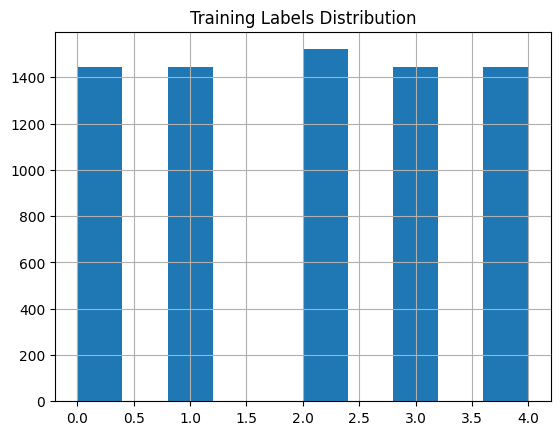

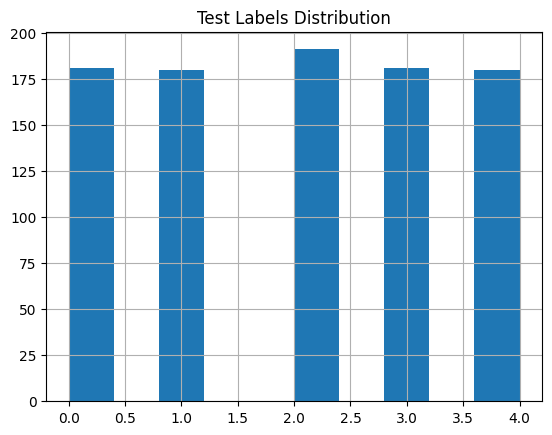

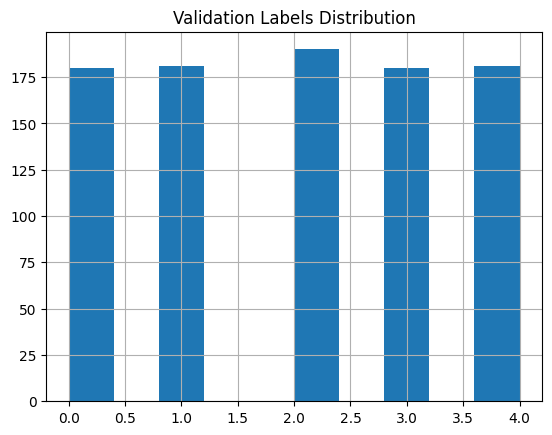

In [4]:
# 检查数据分布
train_y.hist()  # 查看训练集标签分布
plt.title("Training Labels Distribution")
plt.show()

test_y.hist()  # 查看测试集标签分布
plt.title("Test Labels Distribution")
plt.show()

val_y.hist()  # 查看测试集标签分布
plt.title("Validation Labels Distribution")
plt.show()

In [5]:
# 图像处理和展示函数
def process_and_show_images(dataframe, image_dir, title, img_size=224):
    """
    从DataFrame中加载图像，按标签分类展示。
    dataframe: 包含图像ID和标签的DataFrame
    image_dir: 图像所在的目录
    title: 图表标题
    img_size: 调整后的图像大小
    """
    fig = plt.figure(figsize=(25, 16))  # 设置图像画布大小
    for class_id in sorted(dataframe['diagnosis'].unique()):
        # 每个类别随机抽取5张图片
        for i, (idx, row) in enumerate(dataframe[dataframe['diagnosis'] == class_id].sample(5, random_state=SEED).iterrows()):
            ax = fig.add_subplot(5, 5, class_id * 5 + i + 1, xticks=[], yticks=[])
            
            # 拼接图片路径
            img_path = os.path.join(image_dir, f"{row['id_code']}.png")

            # 检查文件是否存在
            if not os.path.exists(img_path):
                print(f"文件未找到: {img_path}")
                continue

            # 读取图像并进行处理
            image = cv2.imread(img_path)
            if image is None:
                print(f"无法加载图像: {img_path}")
                continue
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # 转换为RGB格式
            image = cv2.resize(image, (img_size, img_size))  # 调整大小

            # 显示图像
            plt.imshow(image)
            ax.set_title(f'Label: {class_id}-{row["id_code"]}')
    
    plt.suptitle(title, fontsize=20)
    plt.show()

In [6]:
# 尝试加载多种扩展名的文件
# def find_image_path(image_dir, id_code):
#     for ext in ['.png', '.jpg', '.jpeg']:
#         img_path = os.path.join(image_dir, f"{id_code}{ext}")
#         if os.path.exists(img_path):
#             return img_path
#     return None

# 在代码中应用此函数
# for idx, row in df_train.iterrows():
#     img_path = find_image_path(image_dir, row['id_code'])
#     if img_path is None:
#         print(f"文件未找到: {row['id_code']}")


文件未找到: E:\Univercity_all\Leve4_shang\OBU\FinalProject\aptos2019-blindness-detection\train_images\0024cdab0c1e_aug_890.png
文件未找到: E:\Univercity_all\Leve4_shang\OBU\FinalProject\aptos2019-blindness-detection\train_images\0024cdab0c1e_aug_1295.png
文件未找到: E:\Univercity_all\Leve4_shang\OBU\FinalProject\aptos2019-blindness-detection\train_images\0024cdab0c1e_aug_217.png
文件未找到: E:\Univercity_all\Leve4_shang\OBU\FinalProject\aptos2019-blindness-detection\train_images\0024cdab0c1e_aug_451.png
文件未找到: E:\Univercity_all\Leve4_shang\OBU\FinalProject\aptos2019-blindness-detection\train_images\000c1434d8d7_aug_531.png
文件未找到: E:\Univercity_all\Leve4_shang\OBU\FinalProject\aptos2019-blindness-detection\train_images\0104b032c141_aug_890.png
文件未找到: E:\Univercity_all\Leve4_shang\OBU\FinalProject\aptos2019-blindness-detection\train_images\0104b032c141_aug_1454.png
文件未找到: E:\Univercity_all\Leve4_shang\OBU\FinalProject\aptos2019-blindness-detection\train_images\0104b032c141_aug_217.png
文件未找到: E:\Univercity_a

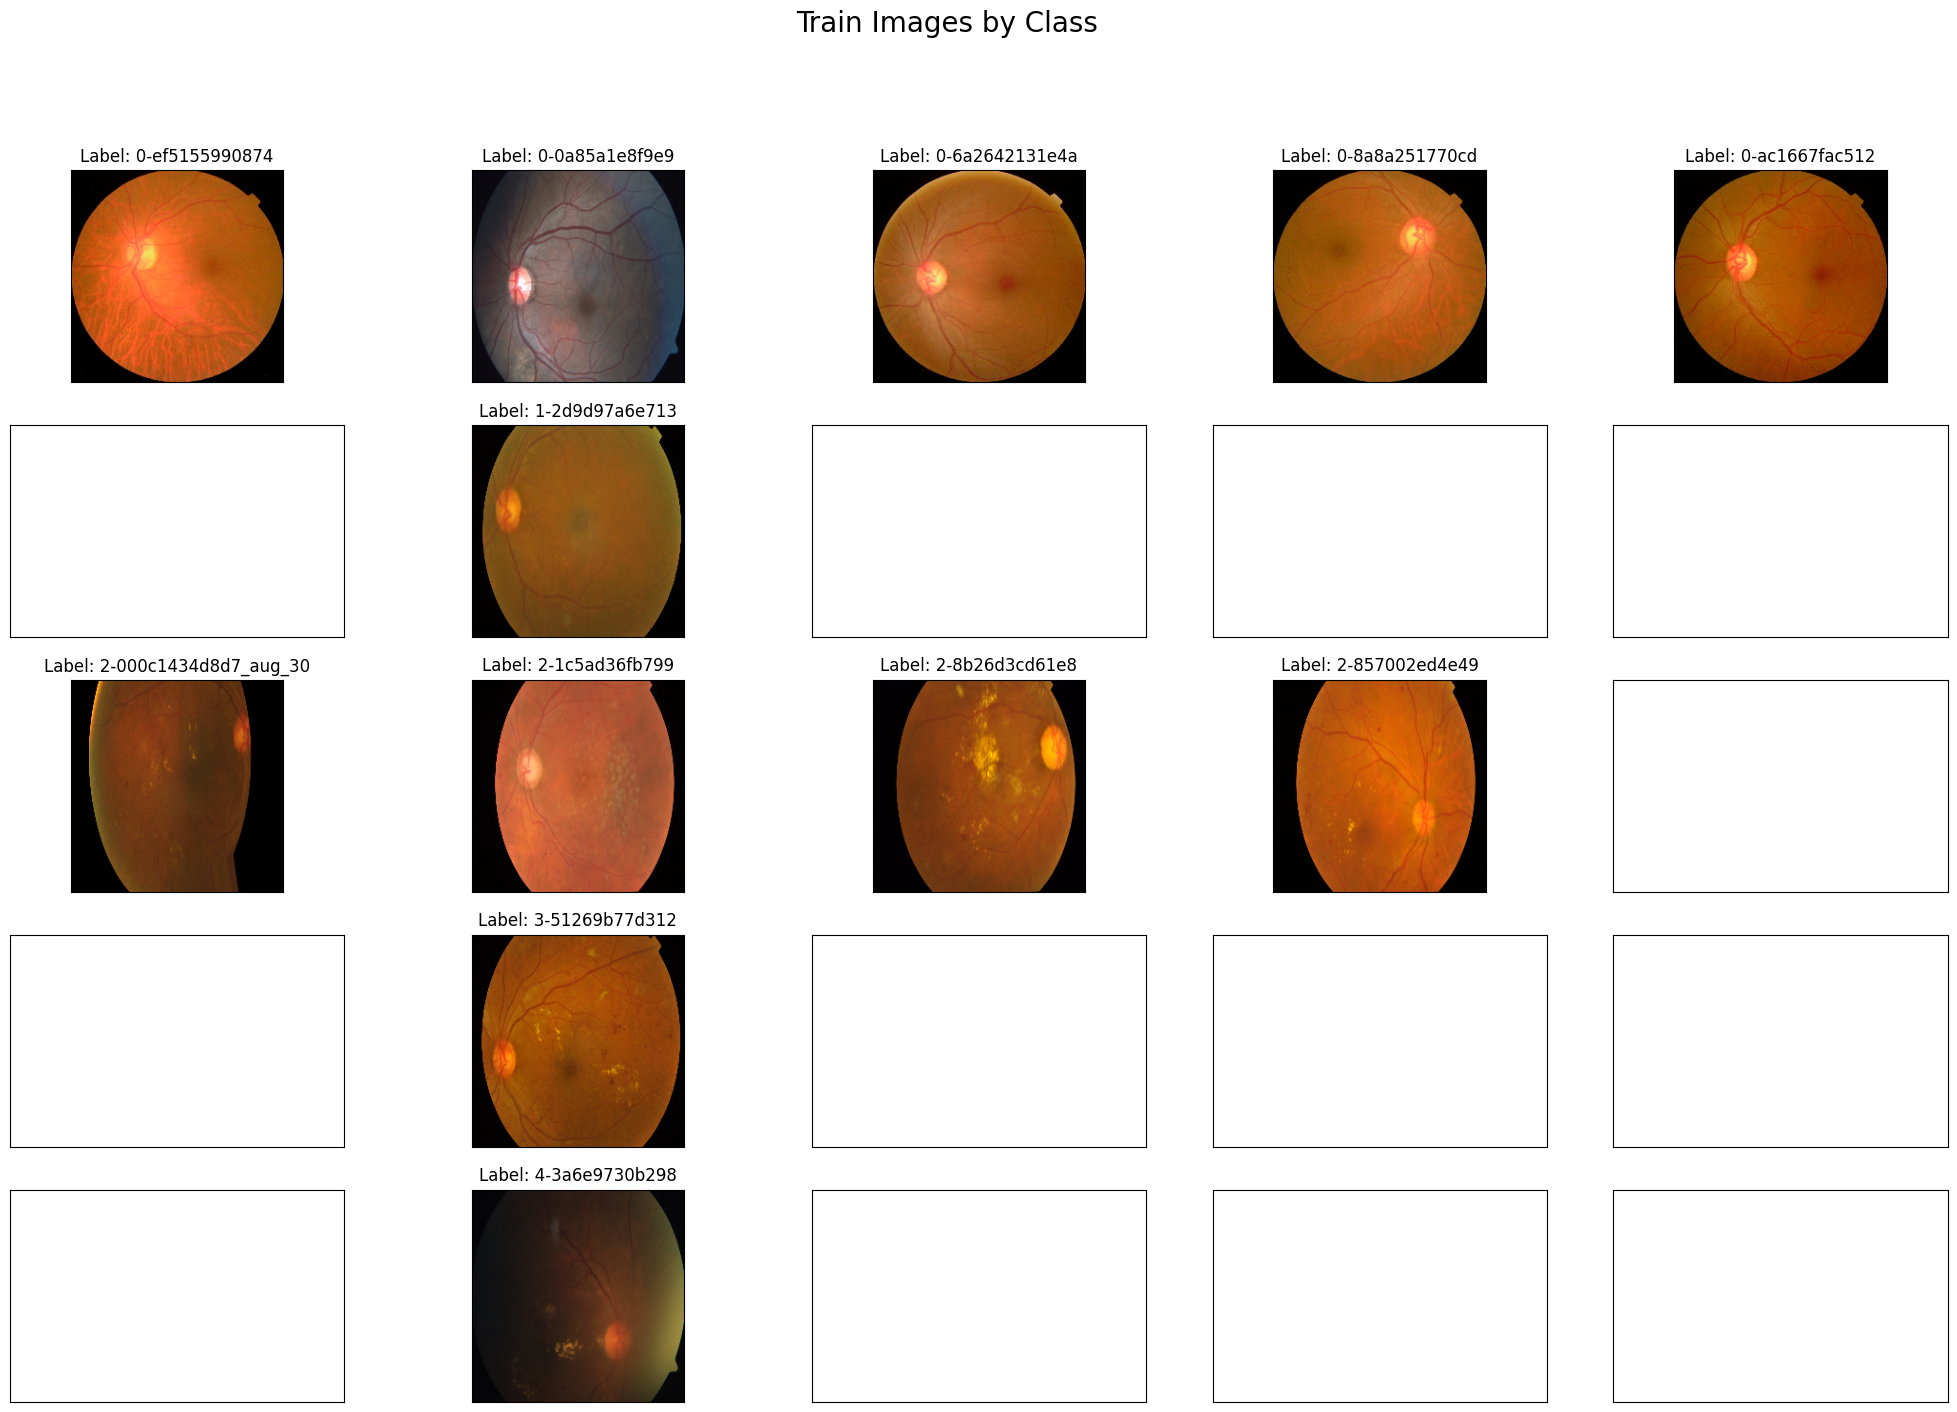

文件未找到: E:\Univercity_all\Leve4_shang\OBU\FinalProject\aptos2019-blindness-detection\train_images\0024cdab0c1e_aug_1075.png
文件未找到: E:\Univercity_all\Leve4_shang\OBU\FinalProject\aptos2019-blindness-detection\train_images\0024cdab0c1e_aug_1371.png
文件未找到: E:\Univercity_all\Leve4_shang\OBU\FinalProject\aptos2019-blindness-detection\train_images\041f09eec1e8_aug_823.png
文件未找到: E:\Univercity_all\Leve4_shang\OBU\FinalProject\aptos2019-blindness-detection\train_images\000c1434d8d7_aug_514.png
文件未找到: E:\Univercity_all\Leve4_shang\OBU\FinalProject\aptos2019-blindness-detection\train_images\0104b032c141_aug_1166.png
文件未找到: E:\Univercity_all\Leve4_shang\OBU\FinalProject\aptos2019-blindness-detection\train_images\0104b032c141_aug_357.png
文件未找到: E:\Univercity_all\Leve4_shang\OBU\FinalProject\aptos2019-blindness-detection\train_images\0104b032c141_aug_1550.png
文件未找到: E:\Univercity_all\Leve4_shang\OBU\FinalProject\aptos2019-blindness-detection\train_images\0104b032c141_aug_480.png
文件未找到: E:\Univercity

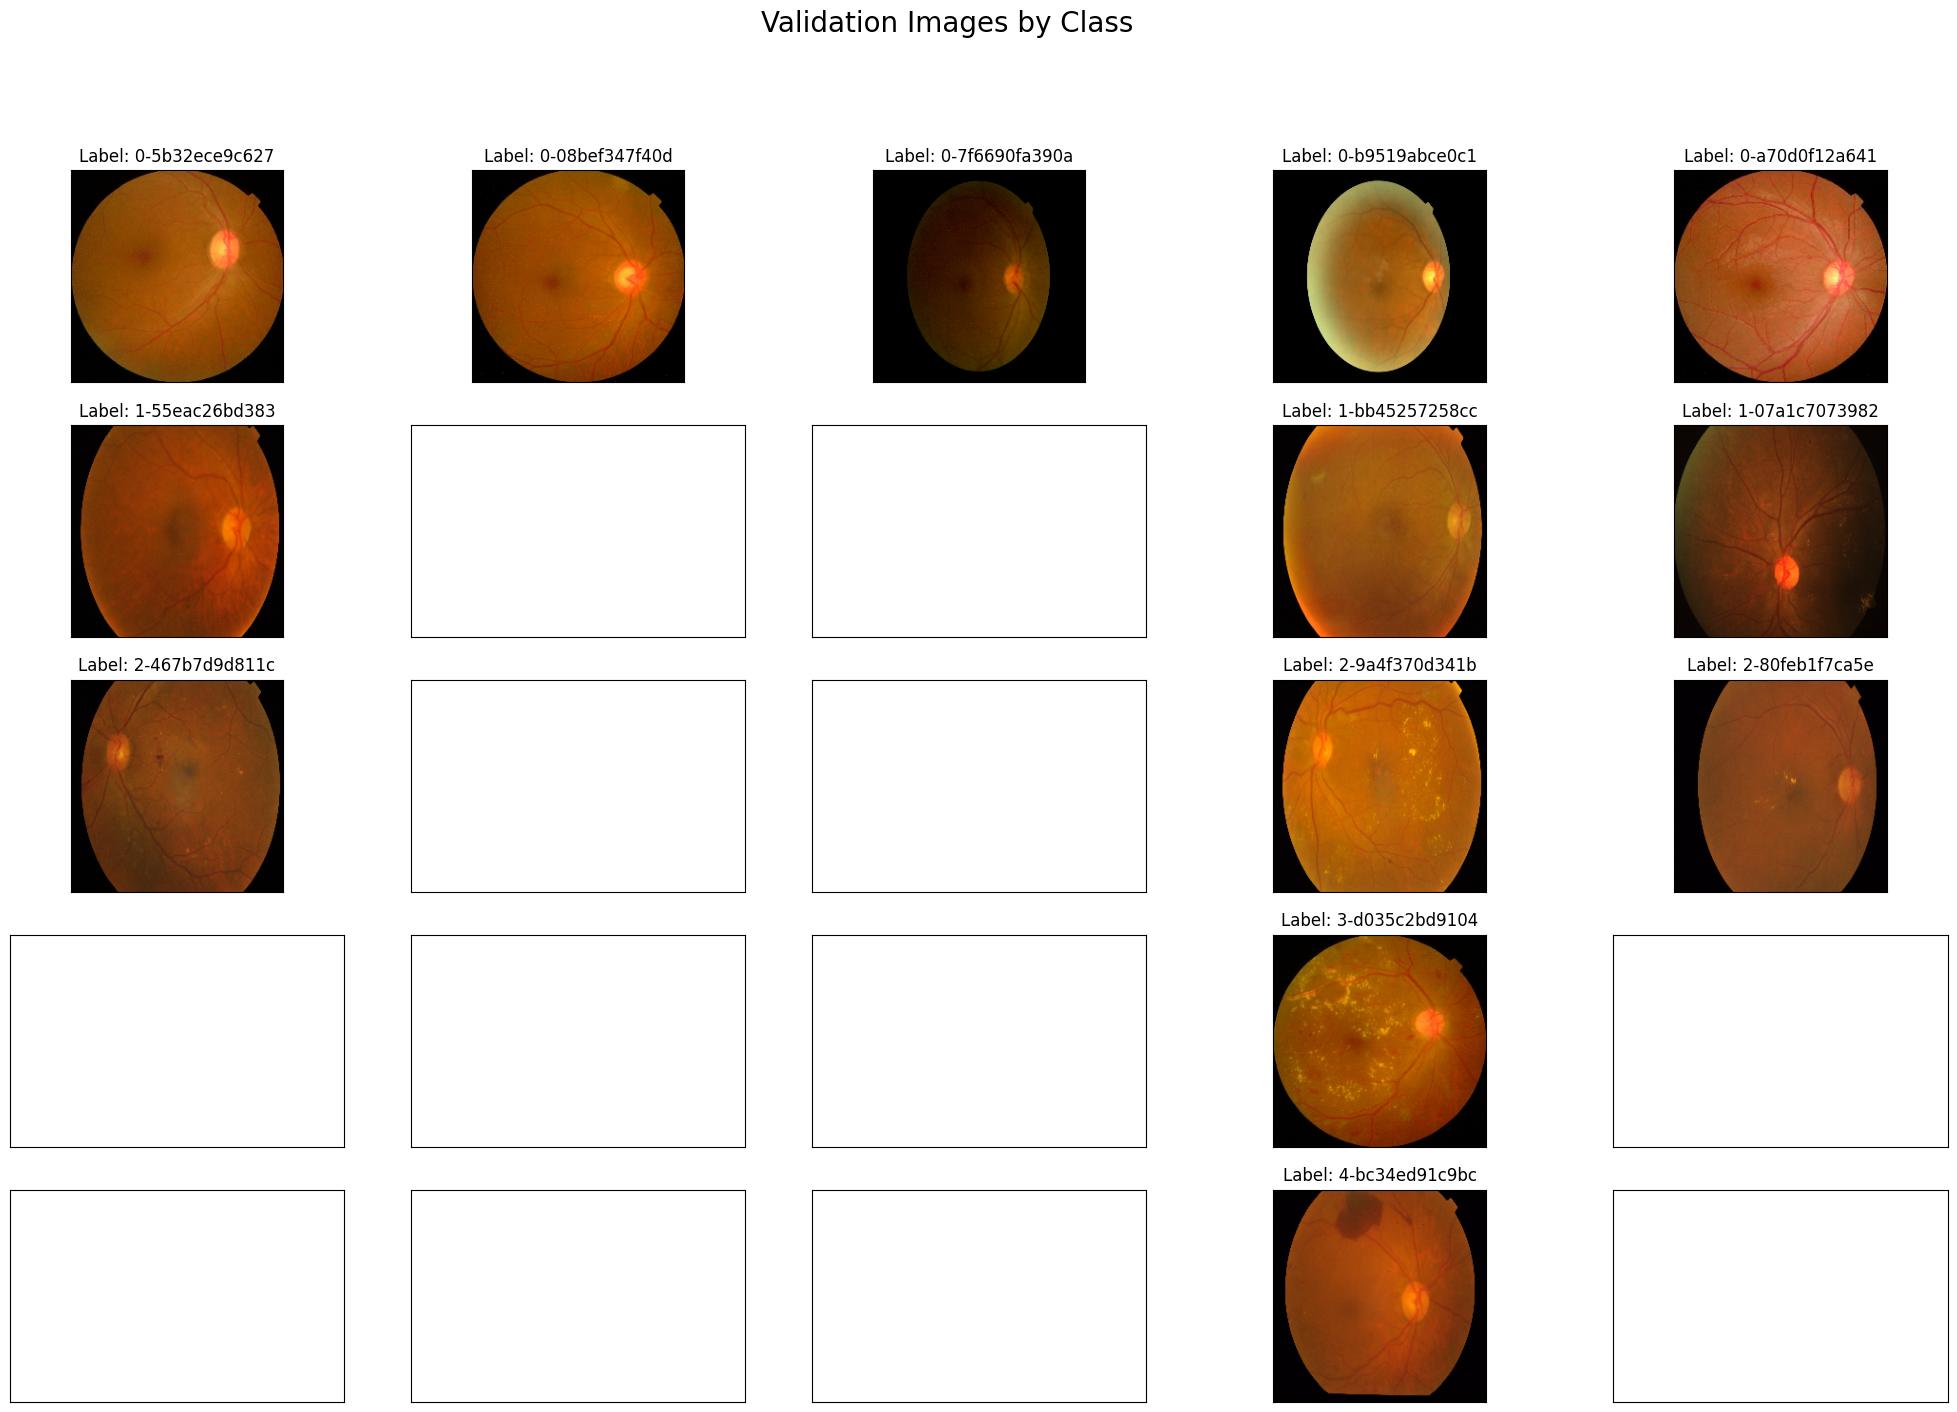

In [7]:
# 显示训练集图像
process_and_show_images(df_train, image_dir, title="Train Images by Class")

# 显示验证集图像
valid_df = pd.DataFrame({"id_code": test_x, "diagnosis": test_y})
process_and_show_images(valid_df, image_dir, title="Validation Images by Class")

In [8]:
# 单个图像的加载和显示
example_path = os.path.join(image_dir, f"{train_x.iloc[0]}.png")
if os.path.exists(example_path):
    image = cv2.imread(example_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # 转换为灰度图
    height, width = image.shape
    
    # 计算显示尺寸
    dpi = 80
    scale = 2  # 缩放比例
    figsize = (width / dpi) / scale, (height / dpi) / scale

    # 显示灰度图
    fig = plt.figure(figsize=figsize)
    plt.imshow(image, cmap='gray')
    plt.title("Example Gray Image")
    plt.show()
else:
    print(f"文件未找到: {example_path}")

文件未找到: E:\Univercity_all\Leve4_shang\OBU\FinalProject\aptos2019-blindness-detection\train_images\0104b032c141_aug_436.png


无法加载图像: E:\Univercity_all\Leve4_shang\OBU\FinalProject\aptos2019-blindness-detection\train_images\0024cdab0c1e_aug_890.png
无法加载图像: E:\Univercity_all\Leve4_shang\OBU\FinalProject\aptos2019-blindness-detection\train_images\0024cdab0c1e_aug_1295.png
无法加载图像: E:\Univercity_all\Leve4_shang\OBU\FinalProject\aptos2019-blindness-detection\train_images\0024cdab0c1e_aug_217.png
无法加载图像: E:\Univercity_all\Leve4_shang\OBU\FinalProject\aptos2019-blindness-detection\train_images\0024cdab0c1e_aug_451.png
无法加载图像: E:\Univercity_all\Leve4_shang\OBU\FinalProject\aptos2019-blindness-detection\train_images\000c1434d8d7_aug_531.png
无法加载图像: E:\Univercity_all\Leve4_shang\OBU\FinalProject\aptos2019-blindness-detection\train_images\0104b032c141_aug_890.png
无法加载图像: E:\Univercity_all\Leve4_shang\OBU\FinalProject\aptos2019-blindness-detection\train_images\0104b032c141_aug_1454.png
无法加载图像: E:\Univercity_all\Leve4_shang\OBU\FinalProject\aptos2019-blindness-detection\train_images\0104b032c141_aug_217.png
无法加载图像: E:\Uni

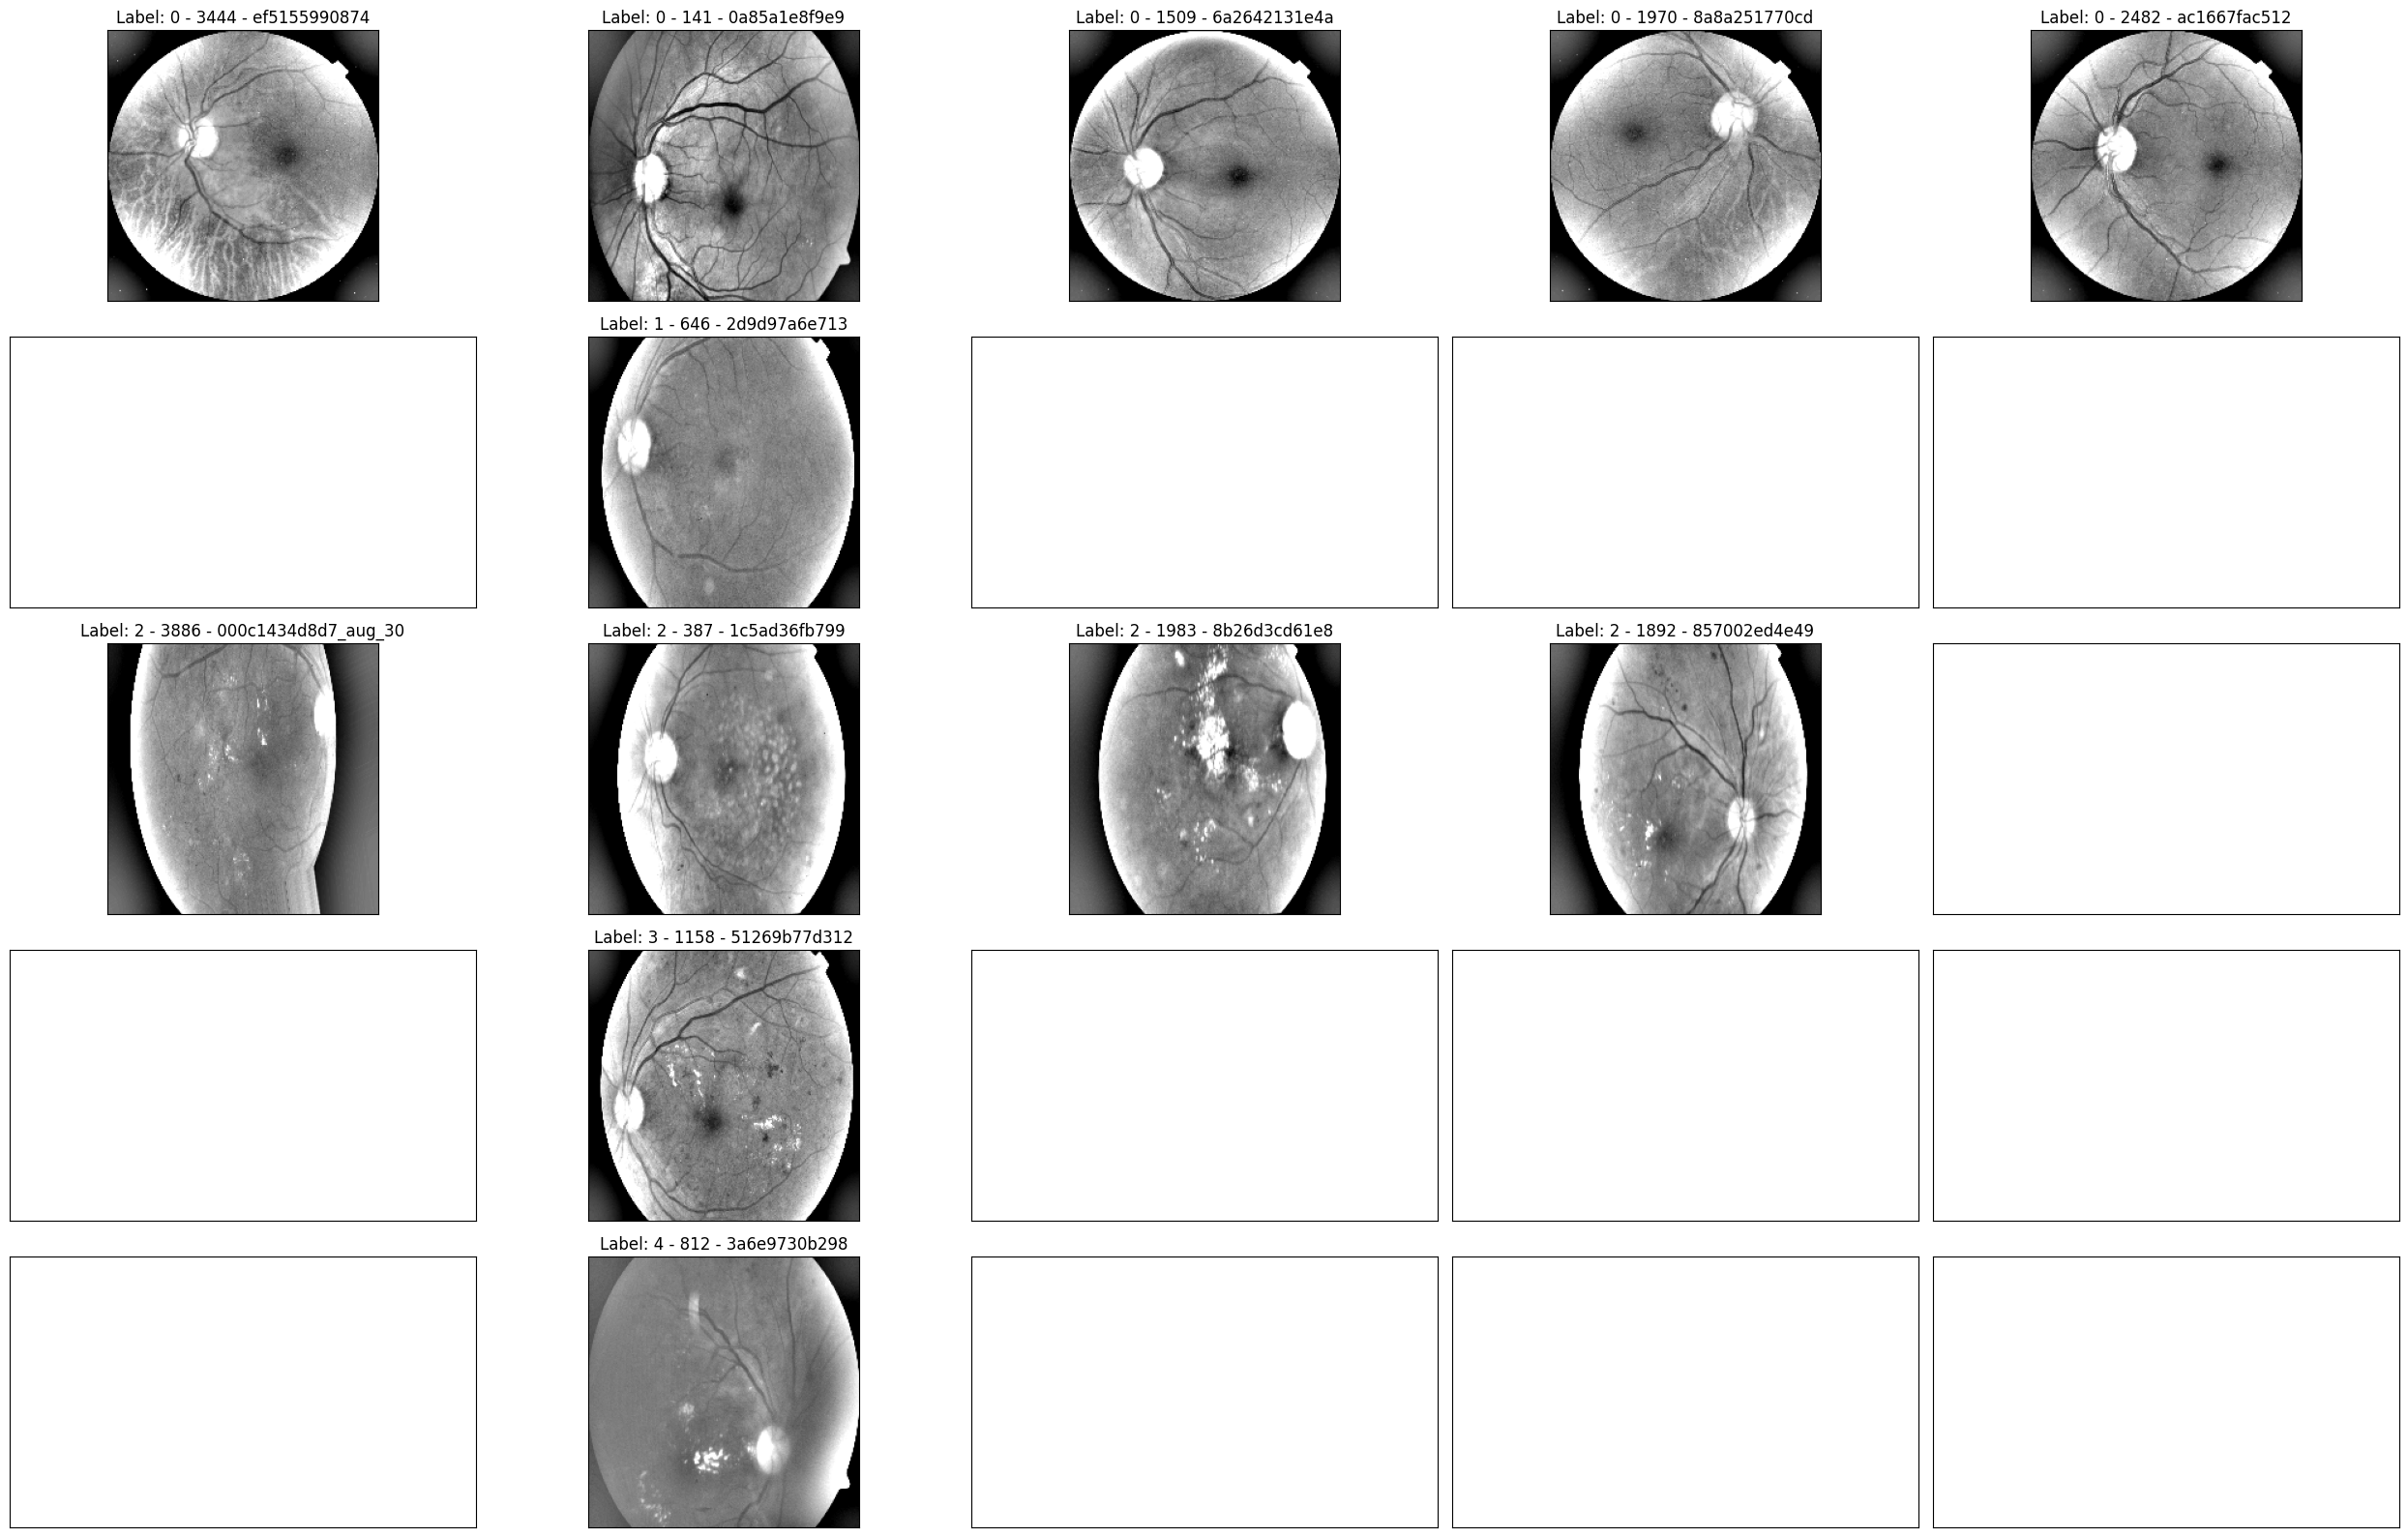

In [9]:
# 绘制并预处理图像
fig = plt.figure(figsize=(25, 16))
for class_id in sorted(train_y.unique()):  # 遍历所有类别
    class_rows = df_train[df_train['diagnosis'] == class_id]
    sample_rows = class_rows.sample(min(5, len(class_rows)), random_state=SEED)  # 采样每类最多5张
    for i, (idx, row) in enumerate(sample_rows.iterrows()):
        ax = fig.add_subplot(5, 5, class_id * 5 + i + 1, xticks=[], yticks=[])
        img_path = os.path.join(image_dir, f"{row['id_code']}.png")
        
        # 加载并预处理图像
        image = cv2.imread(img_path)
        if image is None:
            print(f"无法加载图像: {img_path}")
            continue
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # 转灰度
        image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))  # 调整大小
        image = cv2.addWeighted(image, 4, cv2.GaussianBlur(image, (0, 0), IMG_SIZE / 10), -4, 128)  # 增强对比度
        
        # 显示图像
        plt.imshow(image, cmap='gray')
        ax.set_title(f'Label: {class_id} - {idx} - {row["id_code"]}')

plt.tight_layout()
plt.show()

In [10]:
import matplotlib.pyplot as plt
# 裁剪单通道图像
def crop_single_channel(img, tol=7):
    """
    对单通道图像进行裁剪。
    参数:
        img: 输入单通道图像
        tol: 裁剪的亮度阈值（小于tol的区域将被裁剪）
    返回:
        裁剪后的图像
    """
    mask = img > tol
    if not mask.any():  # 图像过暗，没有有效区域
        return img
    return img[np.ix_(mask.any(1), mask.any(0))]

# 灰度图像裁剪
def crop_image_from_gray(img, tol=7):
    """
    对灰度或RGB图像进行裁剪。
    参数:
        img: 输入图像（灰度或RGB）
        tol: 裁剪的亮度阈值
    返回:
        裁剪后的图像
    """
    if img.ndim == 2:  # 灰度图像
        return crop_single_channel(img, tol)
    elif img.ndim == 3:  # RGB图像
        gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        mask = gray_img > tol
        if not mask.any():  # 图像过暗，没有有效区域
            return img
        cropped_channels = [
            channel[np.ix_(mask.any(1), mask.any(0))] for channel in cv2.split(img)
        ]
        return cv2.merge(cropped_channels)

# 扩展支持RGB的裁剪函数
def crop_image(img, tol=7):
    """
    对灰度或RGB图像裁剪，同时调整裁剪后的尺寸与原始尺寸一致。
    参数:
        img: 输入图像（灰度或RGB）
        tol: 裁剪的亮度阈值
    返回:
        裁剪后的图像，尺寸与原始一致
    """
    h, w = img.shape[:2]
    cropped_img = crop_image_from_gray(img, tol)
    return cv2.resize(cropped_img, (w, h))

# 使用轮廓进行裁剪
def crop_image_with_contours(image, threshold=1):
    """
    使用OpenCV轮廓方法裁剪图像。
    参数:
        image: 输入图像（灰度或RGB）
        threshold: 阈值，用于创建二值图
    返回:
        裁剪后的图像
    """
    if len(image.shape) == 3:  # 转换为灰度图
        gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    else:
        gray = image

    _, thresh = cv2.threshold(gray, threshold, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if contours:
        x, y, w, h = cv2.boundingRect(contours[0])
        return image[y:y+h, x:x+w]
    else:  # 没有有效区域
        return image

# 通用裁剪接口
def universal_crop(image, method='gray', tol=7):
    """
    通用裁剪函数，支持多种裁剪方法。
    参数:
        image: 输入图像（灰度或RGB）
        method: 裁剪方法 ('gray', 'contours')
        tol: 灰度裁剪的亮度阈值（仅用于'method=gray'）
    返回:
        裁剪后的图像
    """
    if method == 'gray':
        return crop_image(image, tol)
    elif method == 'contours':
        return crop_image_with_contours(image)
    else:
        raise ValueError(f"不支持的裁剪方法: {method}")


In [11]:
# 批量处理图像文件夹（裁剪版本）
def process_images(image_dir, method='gray', tol=7):
    """
    对文件夹中的所有图像逐一裁剪，并返回裁剪结果。
    参数:
        image_dir: 输入图像文件夹路径
        method: 裁剪方法 ('gray', 'contours')
        tol: 灰度裁剪的亮度阈值（仅用于'method=gray'）
    返回:
        裁剪后的图像及其文件名的列表
    """
    processed_images = []  # 存储裁剪后的图像及文件名
    for filename in os.listdir(image_dir):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):  # 支持的图像格式
            img_path = os.path.join(image_dir, filename)
            img = cv2.imread(img_path)

            if img is None:
                print(f"无法加载图像: {filename}")
                continue
            
            # 裁剪图像
            cropped_img = universal_crop(img, method=method, tol=tol)
            processed_images.append((cropped_img, filename))
            print(f"裁剪完成: {filename}")
    
    return processed_images


In [12]:
# 图像增强函数
def load_ben_color(img, sigmaX=10):
    """
    对图像进行增强处理。
    参数:
        img: 输入图像（BGR格式）
        sigmaX: 高斯模糊参数，控制模糊程度
    返回:
        处理后的图像
    """
    if img is None:
        return None
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # 转换到RGB
    img = cv2.addWeighted(img, 4, cv2.GaussianBlur(img, (0, 0), sigmaX), -4, 128)  # 图像增强
    return img


In [13]:
def enhance_and_save_images(image_dir, output_dir, sigmaX=10):
    """
    按照裁剪和增强的顺序逐一处理每张图像，并立即保存处理结果。
    参数:
        image_dir: 输入图像文件夹路径
        output_dir: 处理后图像的保存路径
        sigmaX: 高斯模糊参数
    """
    os.makedirs(output_dir, exist_ok=True)  # 确保输出目录存在

    for filename in os.listdir(image_dir):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):  # 检查支持的图像格式
            img_path = os.path.join(image_dir, filename)
            img = cv2.imread(img_path)

            if img is None:
                print(f"无法加载图像: {filename}")
                continue
            
            # 裁剪图像
            cropped_img = universal_crop(img, method='gray', tol=7)  # 灰度裁剪
            if cropped_img is None or cropped_img.size == 0:  # 验证裁剪后的图像有效性
                print(f"裁剪后的图像为空或无效: {filename}")
                continue
            
            # 增强图像
            enhanced_img = load_ben_color(cropped_img, sigmaX=sigmaX)
            if enhanced_img is None:
                print(f"图像增强失败: {filename}")
                continue
            
            # 保存增强后的图像
            output_path = os.path.join(output_dir, filename)
            cv2.imwrite(output_path, cv2.cvtColor(enhanced_img, cv2.COLOR_RGB2BGR))  # 保存为BGR格式
            print(f"裁剪并保存完成: {filename} -> {output_path}")


In [14]:
output_dir = r"E:\Univercity_all\Leve4_shang\OBU\FinalProject\aptos2019-blindness-detection\train_images_processed"

In [15]:
# 批量裁剪，增强并保存
# enhance_and_save_images(image_dir, output_dir, sigmaX=30)

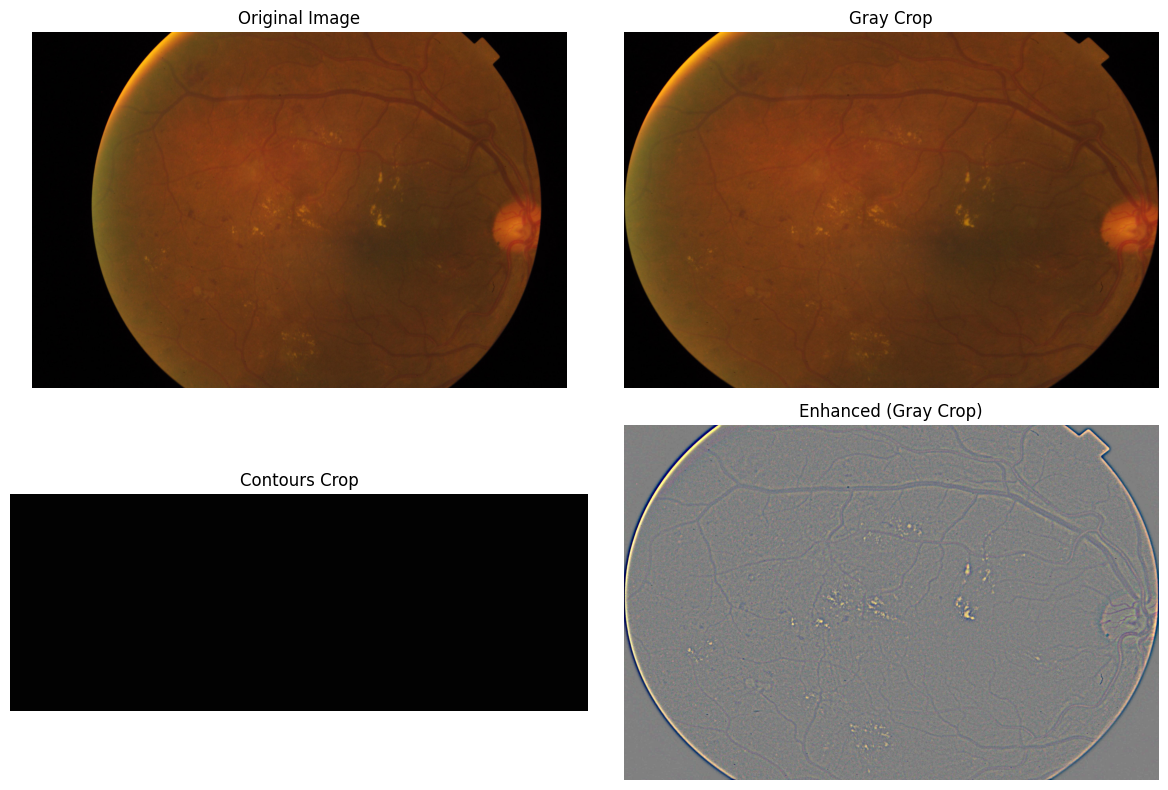

In [16]:
# 可视化示例图像
example_image_path = os.path.join(image_dir, os.listdir(image_dir)[0])
example_image = cv2.imread(example_image_path)

# 图像裁剪
cropped_gray = universal_crop(example_image, method='gray', tol=7)
cropped_contours = universal_crop(example_image, method='contours')

# 图像增强
enhanced_gray = load_ben_color(cropped_gray, sigmaX=10)
enhanced_contours = load_ben_color(cropped_contours, sigmaX=10)

# 可视化对比
plt.figure(figsize=(12, 8))

# 原始图像
plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(example_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# 灰度裁剪
plt.subplot(2, 2, 2)
plt.imshow(cv2.cvtColor(cropped_gray, cv2.COLOR_BGR2RGB))
plt.title('Gray Crop')
plt.axis('off')

# 轮廓裁剪
plt.subplot(2, 2, 3)
plt.imshow(cv2.cvtColor(cropped_contours, cv2.COLOR_BGR2RGB))
plt.title('Contours Crop')
plt.axis('off')

# 增强图像（基于灰度裁剪）
plt.subplot(2, 2, 4)
plt.imshow(enhanced_gray)
plt.title('Enhanced (Gray Crop)')
plt.axis('off')

# 显示图像
plt.tight_layout()
plt.show()


In [17]:
from tensorflow.keras.layers import GlobalAveragePooling2D, Reshape, Dense, Multiply

def se_block(input_tensor, ratio=16):
    channel_axis = -1
    channels = input_tensor.shape[channel_axis]
    
    se = GlobalAveragePooling2D()(input_tensor)
    se = Reshape((1, 1, channels))(se)
    se = Dense(channels // ratio, activation='relu', kernel_initializer='he_normal', use_bias=False)(se)
    se = Dense(channels, activation='sigmoid', kernel_initializer='he_normal', use_bias=False)(se)
    
    return Multiply()([input_tensor, se])

In [18]:
from tensorflow.keras.layers import Conv2D, Activation, Add, Multiply, AveragePooling2D
#Spatial Attention
def spatial_attention(input_tensor):
    # 输入: 形状为 (batch_size, height, width, channels)
    kernel_size = 7
    avg_pool = AveragePooling2D(pool_size=(7, 7), strides=1, padding='same')(input_tensor)
    max_pool = MaxPooling2D(pool_size=(7, 7), strides=1, padding='same')(input_tensor)
    concat = Concatenate(axis=-1)([avg_pool, max_pool])
    
    # 生成空间注意力图
    x = Conv2D(1, (kernel_size, kernel_size), strides=1, padding='same', activation='sigmoid')(concat)
    
    # 使用空间注意力图加权原输入
    return Multiply()([input_tensor, x])


In [19]:
from tensorflow.keras.layers import Layer, Dense, Softmax, Multiply, Permute, Reshape
#Self-Attention
class SelfAttention(Layer):
    def __init__(self, **kwargs):
        super(SelfAttention, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W_q = self.add_weight(shape=(input_shape[-1], input_shape[-1]), initializer="random_normal", trainable=True)
        self.W_k = self.add_weight(shape=(input_shape[-1], input_shape[-1]), initializer="random_normal", trainable=True)
        self.W_v = self.add_weight(shape=(input_shape[-1], input_shape[-1]), initializer="random_normal", trainable=True)
        super(SelfAttention, self).build(input_shape)

    def call(self, inputs):
        Q = tf.matmul(inputs, self.W_q)
        K = tf.matmul(inputs, self.W_k)
        V = tf.matmul(inputs, self.W_v)
        
        attention_scores = tf.matmul(Q, K, transpose_b=True)
        attention_scores = attention_scores / tf.sqrt(tf.cast(tf.shape(K)[-1], tf.float32))
        attention_weights = Softmax(axis=-1)(attention_scores)
        
        attention_output = tf.matmul(attention_weights, V)
        
        return attention_output


from tensorflow.keras.layers import Conv2D, MaxPooling2D, Input, BatchNormalization, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2

# 定义 GuCNN浅层卷积模块 (Shallow convolution module)
def build_GuCNN_module(input_shape):
    inputs = Input(shape=input_shape)            
    # Block 1
    x = Conv2D(64, (3, 3), activation="relu", padding="same", kernel_regularizer=l2(0.01))(inputs)
    x = BatchNormalization()(x)  # BatchNormalization
    x = Conv2D(64, (3, 3), activation="relu", padding="same", kernel_regularizer=l2(0.01))(x)
    x = BatchNormalization()(x)  # BatchNormalization
    x = MaxPooling2D((2, 2), strides=(2, 2))(x)
    #x = se_block(x)  # 添加SE块
    #x = spatial_attention(x)  # 添加空间注意力
    #x = SelfAttention()(x)  # 添加Self-Attention层

    # Block 2
    x = Conv2D(128, (3, 3), activation="relu", padding="same", kernel_regularizer=l2(0.01))(x)
    x = BatchNormalization()(x)  # BatchNormalization
    x = Conv2D(128, (3, 3), activation="relu", padding="same", kernel_regularizer=l2(0.01))(x)
    x = BatchNormalization()(x)  # BatchNormalization
    x = MaxPooling2D((2, 2), strides=(2, 2))(x)
    #x = se_block(x)  # 添加SE块
    #x = spatial_attention(x)  # 添加空间注意力
   # x = SelfAttention()(x)  # 添加Self-Attention层

    # Block 3
    x = Conv2D(256, (3, 3), activation="relu", padding="same", kernel_regularizer=l2(0.01))(x)
    x = BatchNormalization()(x)  # BatchNormalization
    x = Conv2D(256, (3, 3), activation="relu", padding="same", kernel_regularizer=l2(0.01))(x)
    x = BatchNormalization()(x)  # BatchNormalization
    x = Conv2D(256, (3, 3), activation="relu", padding="same", kernel_regularizer=l2(0.01))(x)
    x = BatchNormalization()(x)  # BatchNormalization
    x = MaxPooling2D((2, 2), strides=(2, 2))(x)
    #x = se_block(x)  # 添加SE块
    #x = spatial_attention(x)  # 添加空间注意力
    #x = SelfAttention()(x)  # 添加Self-Attention层
    
    # Block 4
    x = Conv2D(512, (3, 3), activation="relu", padding="same", kernel_regularizer=l2(0.01))(x)
    x = BatchNormalization()(x)  # BatchNormalization
    x = Conv2D(512, (3, 3), activation="relu", padding="same", kernel_regularizer=l2(0.01))(x)
    x = BatchNormalization()(x)  # BatchNormalization
    x = Conv2D(512, (3, 3), activation="relu", padding="same", kernel_regularizer=l2(0.01))(x)
    x = BatchNormalization()(x)  # BatchNormalization
    x = Conv2D(512, (3, 3), activation="relu", padding="same", kernel_regularizer=l2(0.01))(x)
    x = BatchNormalization()(x)  # BatchNormalization
    x = MaxPooling2D((2, 2), strides=(2, 2))(x)
    #x = se_block(x)  # 添加SE块
    #x = spatial_attention(x)  # 添加空间注意力
    #x = SelfAttention()(x)  # 添加Self-Attention层
    

    model = Model(inputs, x, name="GuCNN_Module")
    return model

# 定义 GuCNN 模块
GuCNN_layer = build_GuCNN_module(input_shape=(224, 224, 3))


In [20]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Input, BatchNormalization, Add, ReLU
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2

def build_GuCNN_module(input_shape):
    inputs = Input(shape=input_shape)
    
    def residual_block(x, filters, kernel_size=3):
        shortcut = x
        if x.shape[-1] != filters:
            shortcut = Conv2D(filters, (1, 1), padding="same", kernel_regularizer=l2(0.0005))(x)
        x = Conv2D(filters, (kernel_size, kernel_size), padding="same", kernel_regularizer=l2(0.0005))(x)
        x = BatchNormalization()(x)
        x = ReLU()(x)
        x = Conv2D(filters, (kernel_size, kernel_size), padding="same", kernel_regularizer=l2(0.0005))(x)
        x = BatchNormalization()(x)

        x = se_block(x)
        
        x = Add()([x, shortcut])  # Residual connection
        x = ReLU()(x)
        return x

    # x = residual_block(inputs, 64)
    # x = MaxPooling2D((2, 2), strides=(2, 2))(x)

    # x = residual_block(x, 128)
    # x = MaxPooling2D((2, 2), strides=(2, 2))(x)

    # x = residual_block(x, 256)
    # x = MaxPooling2D((2, 2), strides=(2, 2))(x)

    # x = Conv2D(512, (1, 1), padding="same", kernel_regularizer=l2(0.0005))(x)
    # x = BatchNormalization()(x)
    # x = ReLU()(x)

    # x = residual_block(x, 512)
    
    x = Conv2D(64, (3, 3), padding="same", kernel_regularizer=l2(0.0005))(inputs)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = residual_block(x, 64)
    x = MaxPooling2D((2, 2))(x)

    x = Conv2D(128, (3, 3), padding="same", kernel_regularizer=l2(0.0005))(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = residual_block(x, 128)
    x = MaxPooling2D((2, 2))(x)

    x = Conv2D(256, (3, 3), padding="same", kernel_regularizer=l2(0.0005))(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = Conv2D(256, (3, 3), padding="same", kernel_regularizer=l2(0.0005))(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = residual_block(x, 256)
    x = MaxPooling2D((2, 2))(x)

    x = Conv2D(512, (3, 3), padding="same", kernel_regularizer=l2(0.0005))(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = residual_block(x, 512)
    
    feature_for_gradcam = x
    
    x = MaxPooling2D((2, 2), strides=(2, 2))(x)

    #model = Model(inputs, x, name="GuCNN_Module_with_Residual")
    model = Model(inputs, [feature_for_gradcam, x], name="GuCNN_Module_with_Residual")
    return model

# 构建 GuCNN 模块
GuCNN_layer = build_GuCNN_module(input_shape=(IMG_SIZE, IMG_SIZE, 3))
GuCNN_layer.summary()

input_tensor = Input(shape=(IMG_SIZE, IMG_SIZE, 3))
features = GuCNN_layer(input_tensor)

Model: "GuCNN_Module_with_Residual"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 224, 224, 64  1792        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 224, 224, 64  256        ['conv2d[0][0]']                 
 alization)                     )                                        

from tensorflow.keras.layers import Add, BatchNormalization, ReLU, GlobalAveragePooling2D

# 定义 ResNet 残差模块 (Residual module of ResNet)
def residual_block(x, filters):
    shortcut = x
    x = Conv2D(filters, (3, 3), padding="same")(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    x = Conv2D(filters, (3, 3), padding="same")(x)
    x = BatchNormalization()(x)

    x = Add()([x, shortcut])  # 添加残差连接
    x = ReLU()(x)
    return x

# 定义 ResNet 模块
def build_resnet_module(input_shape):
    inputs = Input(shape=input_shape)
    x = Conv2D(64, (7, 7), strides=(2, 2), padding="same")(inputs)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = MaxPooling2D((3, 3), strides=(2, 2))(x)

    # 添加残差块
    x = residual_block(x, 64)
    x = residual_block(x, 64)

    # 保持空间维度输出
    x = Conv2D(128, (3, 3), padding="same")(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    model = Model(inputs, x, name="ResNet_Module")
    return model

# 定义 ResNet 模块
resnet_layer = build_resnet_module(input_shape=(224, 224, 3))

In [21]:

# 设置图像尺寸
IMG_SIZE = 224  # 可根据实际模型输入调整

# 图像文件目录（根据你的路径设置）
image_dir = r"E:\Univercity_all\Leve4_shang\OBU\FinalProject\aptos2019-blindness-detection\train_images_processed"

# 构造 DataFrame（若已存在则跳过）
train_df = pd.DataFrame({'id_code': train_x, 'diagnosis': train_y})
val_df = pd.DataFrame({'id_code': val_x, 'diagnosis': val_y})


In [22]:
# # 将 diagnosis 转换为字符串类型以适配 categorical 模式
# train_df['diagnosis'] = train_df['diagnosis'].astype(str)
# val_df['diagnosis'] = val_df['diagnosis'].astype(str)

# # 加上扩展名，修复找不到图片的问题
# train_df['id_code'] = train_df['id_code'].astype(str) + ".png"
# val_df['id_code'] = val_df['id_code'].astype(str) + ".png"



In [23]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# # 训练集使用数据增强
# train_datagen = ImageDataGenerator(
#     rescale=1.0 / 255,
#     rotation_range=20,
#     width_shift_range=0.1,
#     height_shift_range=0.1,
#     shear_range=0.1,
#     zoom_range=0.1,
#     horizontal_flip=True,
#     fill_mode='nearest'
# )

# # 验证集和测试集仅归一化
# test_datagen = ImageDataGenerator(rescale=1.0 / 255)

# train_generator = train_datagen.flow_from_dataframe(
#     dataframe=train_df,
#     directory=image_dir,
#     x_col="id_code",
#     y_col="diagnosis",
#     target_size=(IMG_SIZE, IMG_SIZE),
#     batch_size=32,
#     class_mode="categorical"
# )

# val_generator = test_datagen.flow_from_dataframe(
#     dataframe=val_df,
#     directory=image_dir,
#     x_col="id_code",
#     y_col="diagnosis",
#     target_size=(IMG_SIZE, IMG_SIZE),
#     batch_size=32,
#     class_mode="categorical"
# )


In [24]:

from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# 计算 class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_df['diagnosis']),
    y=train_df['diagnosis']
)
class_weights = dict(enumerate(class_weights))
print("类别权重:", class_weights)


类别权重: {0: 1.0106648199445984, 1: 1.0106648199445984, 2: 0.9595003287310979, 3: 1.0106648199445984, 4: 1.0106648199445984}


In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.models import Model

# 读取CSV文件
csv_path = r'E:\Univercity_all\Leve4_shang\OBU\FinalProject\aptos2019-blindness-detection\train_balanced_fixed.csv'
df = pd.read_csv(csv_path)

# 创建训练集、验证集和测试集的数据框
train_df = pd.DataFrame({'id_code': train_x, 'diagnosis': train_y})
val_df = pd.DataFrame({'id_code': val_x, 'diagnosis': val_y})
test_df = pd.DataFrame({'id_code': test_x, 'diagnosis': test_y})

# 确认划分后的数据集大小
print(f"训练集大小: {train_df.shape}, 验证集大小: {val_df.shape}, 测试集大小: {test_df.shape}")

训练集大小: (7297, 2), 验证集大小: (912, 2), 测试集大小: (913, 2)


In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#添加数据增强操作, for Train
datagen = ImageDataGenerator(
    rescale=1.0/255,  # 图像归一化
    rotation_range=20,  # 随机旋转范围
    width_shift_range=0.2,  # 随机水平平移
    height_shift_range=0.2,  # 随机垂直平移
    shear_range=0.2,  # 随机剪切
    zoom_range=0.2,  # 随机缩放
    horizontal_flip=True,  # 随机水平翻转
    fill_mode='nearest',  # 填充模式
)

#only for test and val
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

batch_size=8
IMG_SIZE=224

In [27]:
# 训练集生成器
# 如果文件名不带扩展名，仅添加一次 .png
train_df['id_code'] = train_df['id_code'].apply(lambda x: f"{x}.png" if not x.endswith(".png") else x)

# 移除多余的 .png 后缀
train_df['id_code'] = train_df['id_code'].str.replace(".png.png", ".png")

# 将 diagnosis 列转换为字符串
train_df['diagnosis'] = train_df['diagnosis'].astype(str)


train_generator = datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=r"E:\Univercity_all\Leve4_shang\OBU\FinalProject\aptos2019-blindness-detection\train_images_processed",
    x_col="id_code",
    y_col="diagnosis",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=batch_size,
    class_mode="sparse",
)


Found 7284 validated image filenames belonging to 5 classes.


F:\Anaconda\lib\site-packages\keras\preprocessing\image.py:989: UserWarning: Found 13 invalid image filename(s) in x_col="id_code". These filename(s) will be ignored.
  warnings.warn('Found {} invalid image filename(s) in x_col="{}". '


In [28]:
# 检查 id_code 是否正确
# print(train_df.head())

# 检查拼接路径是否匹配实际文件
# for _, row in train_df.iterrows():
#     img_path = os.path.join(
#         r"E:\Univercity_all\Leve4_shang\OBU\FinalProject\aptos2019-blindness-detection\train_images_processed",
#         row['id_code']
#     )
#     if not os.path.exists(img_path):
#         print(f"Missing file: {img_path}")


In [29]:
# 验证集生成器
val_df['id_code'] = val_df['id_code'].str.replace(".png.png", ".png")
val_df['id_code'] = val_df['id_code'].apply(lambda x: f"{x}.png" if not x.endswith(".png") else x)
val_df['diagnosis'] = val_df['diagnosis'].astype(str)

val_generator = test_datagen.flow_from_dataframe(
    dataframe=val_df,
    directory=r"E:\Univercity_all\Leve4_shang\OBU\FinalProject\aptos2019-blindness-detection\train_images_processed",
    x_col="id_code",
    y_col="diagnosis",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=batch_size,
    class_mode="sparse",
    shuffle=False
)


Found 912 validated image filenames belonging to 5 classes.


In [30]:
#检查 id_code 是否正确
print(val_df.head())

#检查拼接路径是否匹配实际文件
for _, row in val_df.iterrows():
    img_path = os.path.join(
        r"E:\Univercity_all\Leve4_shang\OBU\FinalProject\aptos2019-blindness-detection\train_images_processed",
        row['id_code']
    )
    if not os.path.exists(img_path):
        print(f"Missing file: {img_path}")


                        id_code diagnosis
8841   0104b032c141_aug_830.png         3
5391   001639a390f0_aug_470.png         4
2090           92b0d27fc0ec.png         2
4172   000c1434d8d7_aug_558.png         2
6035  0024cdab0c1e_aug_1049.png         1


In [31]:
for filename in val_df['id_code']:
    file_path = os.path.join(r"E:\Univercity_all\Leve4_shang\OBU\FinalProject\aptos2019-blindness-detection\train_images_processed", filename)
    if not os.path.isfile(file_path):
        print(f"File not found: {file_path}")


In [32]:
print(f"Validation set size: {val_df.shape[0]}")

Validation set size: 912


In [33]:
print(val_df['diagnosis'].value_counts())  # 查看每个类别的数量

diagnosis
2    190
4    181
1    181
3    180
0    180
Name: count, dtype: int64


In [34]:
# 测试集生成器
# 移除多余的 .png 后缀
test_df['id_code'] = test_df['id_code'].str.replace(".png.png", ".png")
# 如果文件名不带扩展名，仅添加一次 .png
test_df['id_code'] = test_df['id_code'].apply(lambda x: f"{x}.png" if not x.endswith(".png") else x)
# 将 diagnosis 列转换为字符串
test_df['diagnosis'] = test_df['diagnosis'].astype(str)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    directory=r"E:\Univercity_all\Leve4_shang\OBU\FinalProject\aptos2019-blindness-detection\train_images_processed",
    x_col="id_code",
    y_col="diagnosis",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=batch_size,
    class_mode="sparse",
    shuffle=False
)


Found 912 validated image filenames belonging to 5 classes.


F:\Anaconda\lib\site-packages\keras\preprocessing\image.py:989: UserWarning: Found 1 invalid image filename(s) in x_col="id_code". These filename(s) will be ignored.
  warnings.warn('Found {} invalid image filename(s) in x_col="{}". '


In [35]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout, Dense, Flatten, GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.models import Model

#GlobalPool
x = GlobalAveragePooling2D()(features[1])#(features) 
x = Dense(256, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(128, activation="relu")(x)
x = Dropout(0.3)(x)
x = Dense(64, activation="relu")(x)
x = Dropout(0.3)(x)
output = Dense(5, activation="softmax")(x)



# 构建完整模型
model = Model(inputs=input_tensor, outputs=output)

In [36]:
# 编译模型
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.losses import SparseCategoricalCrossentropy
import math

epochs = 100
max_epochs = 100

#lr_schedule = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-7, max_lr=1e-3)

initial_learning_rate = 5e-4
lr_schedule = tf.keras.optimizers.schedules.CosineDecayRestarts(
    initial_learning_rate=initial_learning_rate,
    first_decay_steps=5,
    t_mul=2.0,
    m_mul=0.8,
    alpha=1e-6
)

#余弦退火
# def cosine_annealing_lr(epoch, max_epochs, min_lr=1e-7, max_lr=1e-3):
#     cos_inner = np.pi * (epoch % max_epochs) / max_epochs
#     lr = min_lr + (max_lr - min_lr) * (1 + np.cos(cos_inner)) / 2
#     return lr

# lr_scheduler = tf.keras.callbacks.LearningRateScheduler(
#     lambda epoch: cosine_annealing_lr(epoch, max_epochs)
# )


# reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-7)



# 编译模型时使用优化器, 使用梯度裁剪的 Adam 优化器
optimizer = Adam(learning_rate=lr_schedule, clipnorm=1.0) #clipvalue=0.5 

#optimizer = Adam(learning_rate=1e-3, clipnorm=1.0)



model.compile(
    optimizer=optimizer,
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

# 打印模型摘要
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 GuCNN_Module_with_Residual   [(None, 28, 28, 512),    8465920   
 (Functional)                 (None, 14, 14, 512)]               
                                                                 
 global_average_pooling2d_4   (None, 512)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_8 (Dense)             (None, 256)               131328    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_9 (Dense)             (None, 128)               32896 

In [37]:
# 获取训练集大小
train_samples = train_generator.samples  # 自动获取真实图片数量
steps_per_epoch = math.ceil(train_samples / batch_size)
total_steps = steps_per_epoch * epochs
warmup_steps = int(0.1 * total_steps)  # warmup 占前10%

print(f"Train samples: {train_samples}")
print(f"Steps per epoch: {steps_per_epoch}")
print(f"Total steps: {total_steps}")
print(f"Warmup steps: {warmup_steps}")


Train samples: 7284
Steps per epoch: 456
Total steps: 45600
Warmup steps: 4560


In [38]:
from tensorflow.keras.callbacks import EarlyStopping

# 定义早停机制
early_stopping = EarlyStopping(
    monitor='val_loss',  # 监控验证集的损失
    patience=8,  # 如果验证集损失连续n个epoch不改善，停止训练
    restore_best_weights=True,  # 在训练停止时恢复模型的最佳权重
)

warmup_cosine = WarmUpCosineDecayScheduler(
    learning_rate_base=1e-3,  # 初始学习率
    total_steps=total_steps,
    warmup_steps=warmup_steps,
    min_lr=1e-8
)

In [39]:
from tensorflow.keras.callbacks import Callback
import tensorflow.keras.backend as K

class LearningRateLogger(Callback):
    def on_epoch_end(self, epoch, logs=None):
        lr = self.model.optimizer._decayed_lr(tf.float32).numpy()
        print(f"\nEpoch {epoch+1}: Learning Rate is {lr:.8f}")

In [40]:
#callbacks = [early_stopping, LearningRateLogger()]
callbacks = [early_stopping]#LearningRateLogger() 

# 训练模型
history = model.fit(
    train_generator,
    #epochs=max_epochs,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=val_generator, #启用验证集
    class_weight=class_weights,
    #validation_freq=2,
    callbacks= callbacks
)



Epoch 1/100
456/456 [==============================] - 1133s 2s/step - loss: 2.0869 - accuracy: 0.6728 - val_loss: 3.1278 - val_accuracy: 0.5625
Epoch 2/100
456/456 [==============================] - 1119s 2s/step - loss: 1.4530 - accuracy: 0.8524 - val_loss: 1.2409 - val_accuracy: 0.8816
Epoch 3/100
456/456 [==============================] - 1122s 2s/step - loss: 1.2137 - accuracy: 0.8784 - val_loss: 1.4597 - val_accuracy: 0.7522
Epoch 4/100
456/456 [==============================] - 1129s 2s/step - loss: 1.1087 - accuracy: 0.8736 - val_loss: 1.1560 - val_accuracy: 0.8531
Epoch 5/100
456/456 [==============================] - 1123s 2s/step - loss: 0.9653 - accuracy: 0.8920 - val_loss: 0.9111 - val_accuracy: 0.9013
Epoch 6/100
456/456 [==============================] - 1136s 2s/step - loss: 0.9310 - accuracy: 0.8904 - val_loss: 2.1732 - val_accuracy: 0.5439
Epoch 7/100
456/456 [==============================] - 1130s 2s/step - loss: 0.8870 - accuracy: 0.8910 - val_loss: 1.1324 - val_ac

In [41]:
# 打印出训练和验证的损失及准确率
print("Best in train：")
print(f"Train Accuracy: {history.history['accuracy'][-9]}")
print(f"Val_Accuracy: {history.history['val_accuracy'][-9]}")

# 评估模型在测试集上的最终表现
loss, accuracy = model.evaluate(test_generator)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")


Best in train：
Train Accuracy: 0.9257276058197021
Val_Accuracy: 0.905701756477356
57/57 [==============================] - 116s 2s/step - loss: 0.4642 - accuracy: 0.8980
Test Loss: 0.46416372060775757
Test Accuracy: 0.8980262875556946


In [42]:
import seaborn as sns
from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
from sklearn.preprocessing import label_binarize

# 预测测试集结果
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)  # 获取每个样本的预测类别

# 获取测试集的真实标签
y_true = test_generator.classes  # 获取测试集真实标签
class_labels = test_generator.class_indices  # 获取类别标签映射

# 计算 F1-score, Recall 和 Precision
f1 = f1_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')
precision = precision_score(y_true, y_pred_classes, average='weighted')

print(f"F1-score: {f1}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")

# 打印分类报告
print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes, target_names=list(class_labels.keys())))

57/57 [==============================] - 111s 2s/step
F1-score: 0.8988257134209828
Recall: 0.8980263157894737
Precision: 0.902619739068931

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       180
           1       0.84      0.93      0.88       180
           2       0.79      0.81      0.80       191
           3       0.99      0.87      0.93       181
           4       0.96      0.92      0.94       180

    accuracy                           0.90       912
   macro avg       0.90      0.90      0.90       912
weighted avg       0.90      0.90      0.90       912



In [43]:
# 保存整个模型（包括结构、权重和优化器状态）
model.save(r'E:\Univercity_all\Leve4_xia\Final Project\Result\my_model.h5')  # 保存为 HDF5 格式


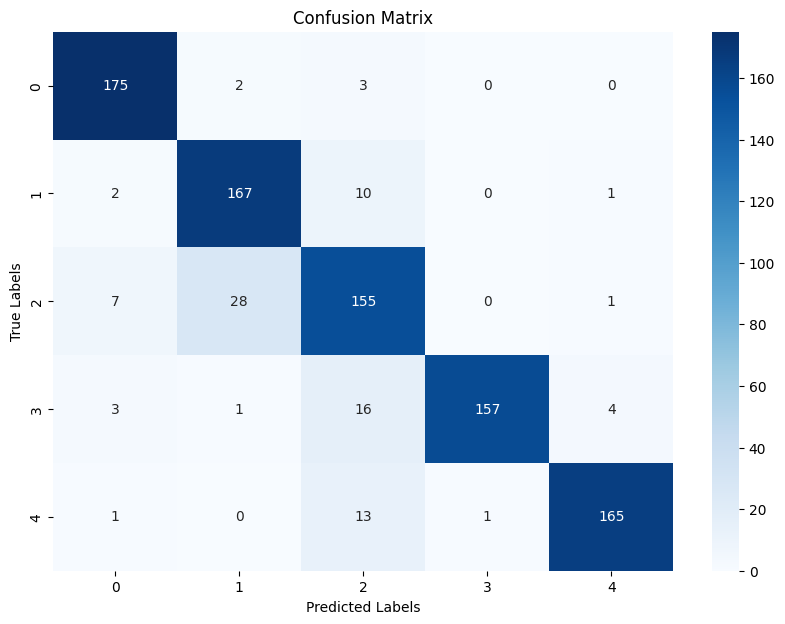

In [44]:
# 计算并绘制混淆矩阵
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

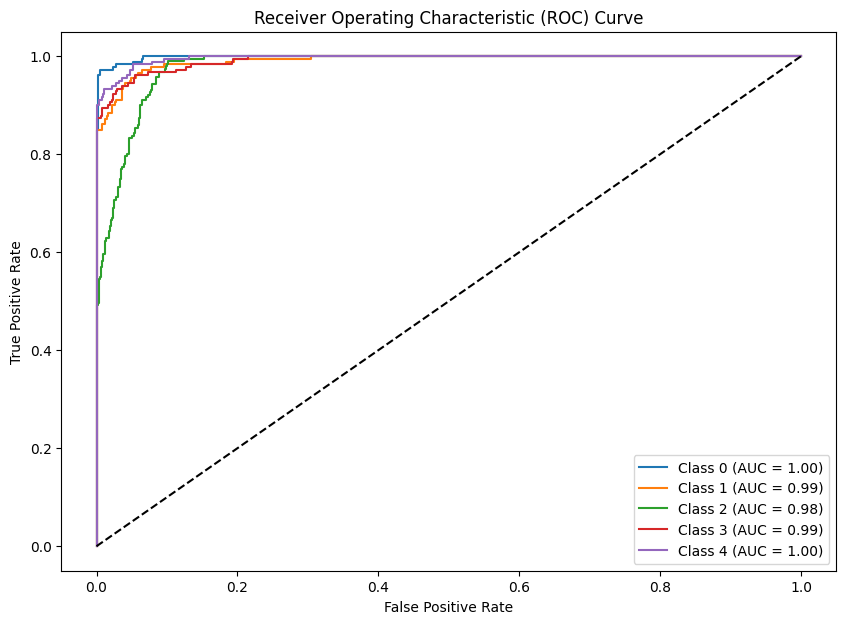

In [45]:
# 绘制ROC曲线
# 由于多类别问题，我们需要计算每个类别的ROC曲线
y_true_bin = label_binarize(y_true, classes=np.arange(len(class_labels)))  # 将真实标签转换为二进制格式

fpr, tpr, roc_auc = {}, {}, {}
for i in range(len(class_labels)):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred[:, i])  # 计算每个类别的fpr、tpr
    roc_auc[i] = auc(fpr[i], tpr[i])  # 计算每个类别的AUC值

# 绘制ROC曲线
plt.figure(figsize=(10, 7))
for i in range(len(class_labels)):
    plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc[i]:0.2f})")

plt.plot([0, 1], [0, 1], 'k--')  # 随机分类器的ROC曲线
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

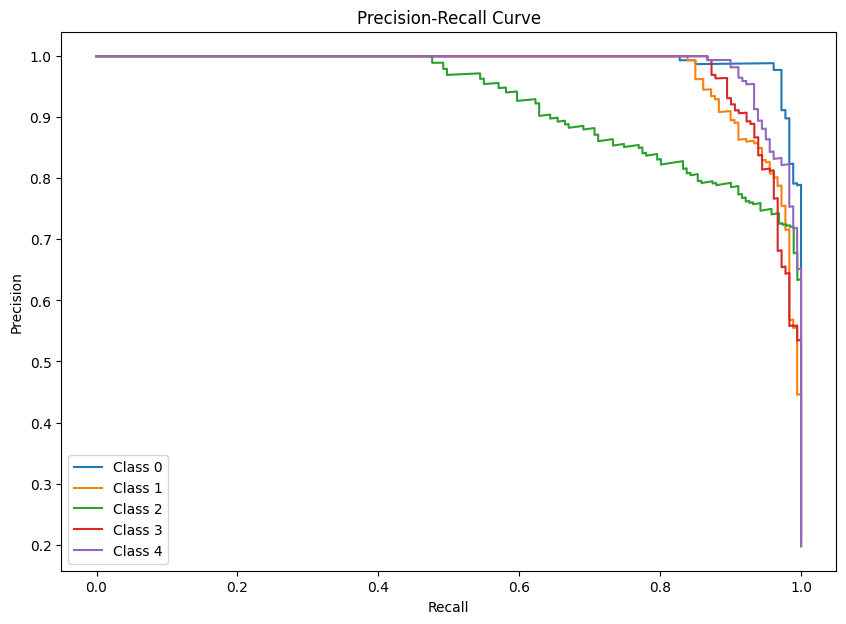

In [46]:
# 绘制Precision-Recall曲线
# 计算每个类别的Precision-Recall曲线
precision_curve, recall_curve, _ = {}, {}, {}
for i in range(len(class_labels)):
    precision_curve[i], recall_curve[i], _ = precision_recall_curve(y_true_bin[:, i], y_pred[:, i])  # 计算PR曲线

# 绘制Precision-Recall曲线
plt.figure(figsize=(10, 7))
for i in range(len(class_labels)):
    plt.plot(recall_curve[i], precision_curve[i], label=f"Class {i}")

plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')
plt.show()

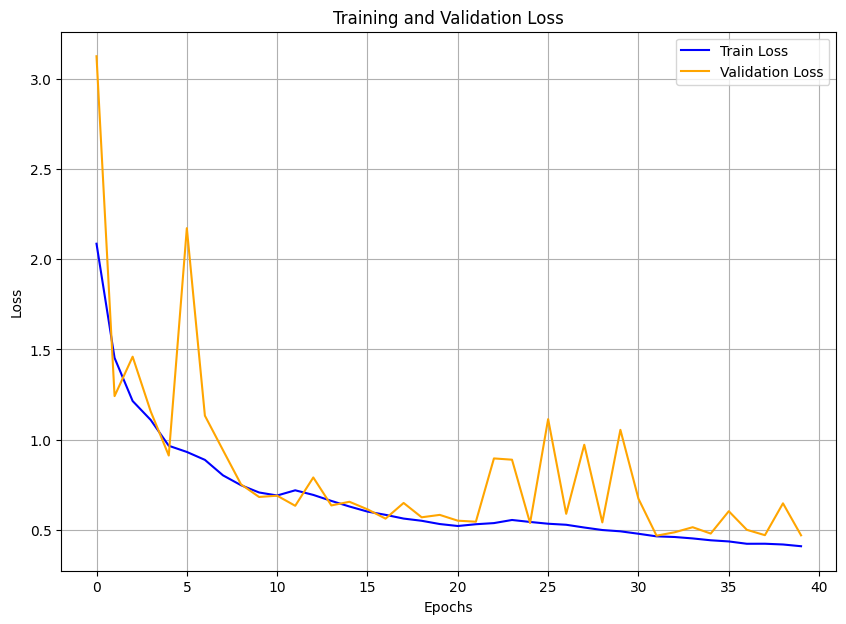

In [47]:
# 绘制训练过程中的Loss曲线
plt.figure(figsize=(10, 7))
plt.plot(history.history['loss'], label='Train Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


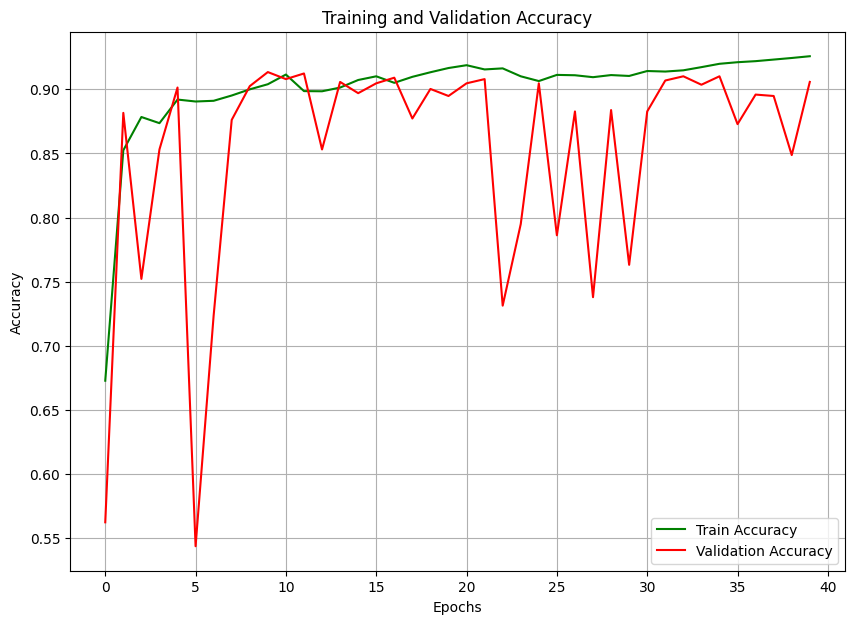

In [48]:
# 绘制训练过程中的Accuracy曲线
plt.figure(figsize=(10, 7))
plt.plot(history.history['accuracy'], label='Train Accuracy', color='green')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')

plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2

# 定义Grad-CAM函数
def grad_cam(model, img_array, layer_name="GuCNN_Module_with_Residual"):
    """
    使用Grad-CAM来生成热力图

    :param model: 训练好的模型
    :param img_array: 处理过的图像数组 (batch_size, height, width, channels)
    :param layer_name: 要使用的卷积层名称（通常是最后一个卷积层）
    :return: 返回生成的热力图
    """
    # 获取目标层的输出
    target_layer = model.get_layer(layer_name)

    # 构建一个新模型，输出目标层的输出和最后的分类结果
    grad_model = tf.keras.models.Model(
        [model.inputs], [target_layer.output, model.output]
    )

    # 计算目标层的梯度
    with tf.GradientTape() as tape:
        # 将图像张量转为需要的形状
        tape.watch(img_array)
        conv_output, predictions = grad_model(img_array)
        class_id = np.argmax(predictions[0])  # 获取预测的类
        loss = predictions[:, class_id]  # 使用该类的预测值作为损失

    # 计算梯度
    grads = tape.gradient(loss, conv_output)

    # 计算梯度加权特征图（梯度平均）
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # 获取卷积输出并加权
    conv_output = conv_output[0]  # batch_size=1 时，选择第一个样本
    heatmap = tf.reduce_sum(tf.multiply(pooled_grads, conv_output), axis=-1)

    # 归一化热力图
    heatmap = np.maximum(heatmap, 0)  # 只保留正的梯度
    heatmap /= np.max(heatmap)  # 最大值归一化

    return heatmap

# 可视化函数：将热力图叠加到原始图像上
def visualize_grad_cam(img_array, heatmap):
    """
    将热力图叠加到原始图像上进行可视化
    """
    # 将图像从 (224, 224, 3) 转换为 (224, 224, 3) 0-255 的格式
    img = img_array[0].numpy()
    img = np.uint8(cv2.cvtColor(img, cv2.COLOR_RGB2BGR))

    # 调整热力图的大小
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))

    # 将热力图归一化并进行颜色映射
    heatmap = np.uint8(255 * heatmap)  # 0到255之间
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    # 将热力图叠加到原图上
    superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)

    # 显示图片
    plt.imshow(superimposed_img)
    plt.axis('off')
    plt.show()

# 示例：假设你的图像已经预处理并存储在 img_array 变量中
# img_array 是一个形状为 (1, 224, 224, 3) 的 NumPy 数组
img_array = np.expand_dims(img_array, axis=0)  # 添加 batch_size 维度

# 生成热力图
heatmap = grad_cam(model, img_array, layer_name="GuCNN_Module_with_Residual")

# 可视化热力图
visualize_grad_cam(img_array, heatmap)


In [61]:
from tensorflow.keras.preprocessing import image

def grad_cam(model, img_array, layer_name="feature_for_gradcam"):
    """
    使用Grad-CAM来生成热力图
    """
    img_array = tf.convert_to_tensor(img_array)

    # 找到目标层
    target_layer = model.get_layer(layer_name)

    # 创建一个新的模型，输入是原模型输入，输出是【中间特征层 + 最后输出】
    grad_model = tf.keras.models.Model(
        inputs=model.input,
        outputs=[target_layer.output, model.output]  # 注意这里是目标层和最终输出
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array, training=False)
        class_id = tf.argmax(predictions[0])
        loss = predictions[:, class_id]

    # 计算梯度
    grads = tape.gradient(loss, conv_outputs)

    # 取平均得到每个通道的重要性
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # 将特征图和通道重要性加权
    conv_output = conv_outputs[0]
    heatmap = tf.reduce_sum(tf.multiply(pooled_grads, conv_output), axis=-1)

    # ReLU激活，并归一化
    heatmap = tf.maximum(heatmap, 0)
    heatmap /= tf.reduce_max(heatmap) + 1e-8
    heatmap = heatmap.numpy()

    return heatmap



# 可视化函数：将热力图叠加到原始图像上
def visualize_grad_cam(img_array, heatmap):
    """
    将热力图叠加到原始图像上进行可视化
    """
    # 将图像从 (224, 224, 3) 转换为 (224, 224, 3) 0-255 的格式
    img = img_array[0].numpy()
    img = np.uint8(cv2.cvtColor(img, cv2.COLOR_RGB2BGR))

    # 调整热力图的大小
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))

    # 将热力图归一化并进行颜色映射
    heatmap = np.uint8(255 * heatmap)  # 0到255之间
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    # 将热力图叠加到原图上
    superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)

    # 显示图片
    plt.imshow(superimposed_img)
    plt.axis('off')
    plt.show()

# 示例：假设你的图像已经预处理并存储在 img_array 变量中
# img_array 是一个形状为 (1, 224, 224, 3) 的 NumPy 数组

# 加载图片
img_path = r'E:\Univercity_all\Leve4_shang\OBU\FinalProject\aptos2019-blindness-detection\test_images\0a2b5e1a0be8.png'
img = image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))  # 确保大小对齐

# 转成numpy数组
img_array = image.img_to_array(img)

# 归一化到[0,1]（如果你的训练是这么做的）
img_array = img_array / 255.0

# 加上batch维度
img_array = np.expand_dims(img_array, axis=0)  # 添加 batch_size 维度

# 生成热力图
heatmap = grad_cam(model, img_array, layer_name="GuCNN_Module_with_Residual")


# 可视化热力图
visualize_grad_cam(img_array, heatmap)


ValueError: Graph disconnected: cannot obtain value for tensor KerasTensor(type_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_1'), name='input_1', description="created by layer 'input_1'") at layer "conv2d". The following previous layers were accessed without issue: []

In [59]:
def print_all_conv_layers(model):
    for layer in model.layers:
        # 如果是 Conv2D，就打印
        if isinstance(layer, tf.keras.layers.Conv2D):
            print(layer.name)
        # 如果是 Model 或 Sequential，递归进入
        elif isinstance(layer, tf.keras.Model) or isinstance(layer, tf.keras.Sequential):
            print_all_conv_layers(layer)

# 调用
print_all_conv_layers(model)


conv2d
conv2d_1
conv2d_2
conv2d_3
conv2d_4
conv2d_5
conv2d_6
conv2d_7
conv2d_8
conv2d_9
conv2d_10
conv2d_11
conv2d_12
